In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import itertools

In [2]:
df = pd.read_csv("./KhattTech UX Research (Responses) - Form responses 1.csv")
df.head()

,Timestamp,How frequently do you need to extract Arabic handwritten text from images?,What is your primary use case for extracting Arabic handwritten text?,What is your biggest challenge when trying to extract Arabic handwritten text?,How satisfied are you with the accuracy of existing Arabic Handwritten Recognition tools?,What features would you like in an Arabic Handwritten Recognition app?,"How important is it for you to share extracted text through messaging apps (e.g., WhatsApp, Signal, Messenger)?","Would you use a mobile app for Arabic Handwritten Recognition? (Yes/No)\nIf No, why not?",Do you have any additional feedback or suggestions for improving Arabic Handwritten Recognition technology?,"If a high-accuracy Arabic Handwritten Recognition app were available, how much would you be willing to pay for it?",Which of the following would be dealbreakers for you in an Arabic Handwritten Recognition app? (Select all that apply)
0,19/03/2025 18:53:13,Weekly,Personal note-taking & organization,"Difficulties with image quality (blurry, low c...",2,"High-accuracy text recognition, Support for mu...",3,yes,Would be nice to have such mobile applications.,I would pay a one-time fee,"No offline mode, Poor app design or usability"
1,19/03/2025 19:48:47,Monthly,Banking/financial documentation,Poor accuracy in recognizing text,2,"High-accuracy text recognition, Ability to edi...",4,Yes,Nope,I prefer a free version with ads,"Low recognition accuracy, No offline mode"
2,19/03/2025 20:14:40,Monthly,Personal note-taking & organization,No access to a reliable Arabic OCR tool,2,"Ability to edit extracted text before saving, ...",3,Yes,No,I prefer a free version with ads,"Low recognition accuracy, No offline mode, Poo..."
3,19/03/2025 20:48:05,Rarely,Documentation & archiving,"Poor accuracy in recognizing text, Difficultie...",3,"High-accuracy text recognition, Ability to edi...",4,"Yes, some times",You can provide the service for free at the be...,I prefer a free version with ads,"Low recognition accuracy, Limited export optio..."
4,19/03/2025 21:09:10,Monthly,Personal note-taking & organization,"Difficulties with image quality (blurry, low c...",3,"High-accuracy text recognition, Ability to edi...",2,Yes,I would use it actually,I prefer a free version with ads,"Low recognition accuracy, Limited export optio..."


In [3]:
df.shape

(17, 11)

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 11 columns):
 #   Column                                                                                                                  Non-Null Count  Dtype 
---  ------                                                                                                                  --------------  ----- 
 0   Timestamp                                                                                                               17 non-null     object
 1   How frequently do you need to extract Arabic handwritten text from images?                                              17 non-null     object
 2   What is your primary use case for extracting Arabic handwritten text?                                                   17 non-null     object
 3   What is your biggest challenge when trying to extract Arabic handwritten text?                                          17 non-null     object
 4   How 

In [26]:
df.columns = [col.rstrip() for col in df.columns]

In [27]:
# Rename columns for clarity
df.rename(columns={
    "How frequently do you need to extract Arabic handwritten text from images?": "Usage Frequency",
    "What is your primary use case for extracting Arabic handwritten text?": "Primary Use Case",
    "What is your biggest challenge when trying to extract Arabic handwritten text?": "Biggest Challenge",
    "How satisfied are you with the accuracy of existing Arabic Handwritten Recognition tools?": "Satisfaction",
    "What features would you like in an Arabic Handwritten Recognition app?": "Desired Features",
    "How important is it for you to share extracted text through messaging apps (e.g., WhatsApp, Signal, Messenger)?": "Importance of Sharing",
    "Would you use a mobile app for Arabic Handwritten Recognition? (Yes/No)\nIf No, why not?": "Would Use Mobile App",
    "Do you have any additional feedback or suggestions for improving Arabic Handwritten Recognition technology?": "Additional Feedback",
    "If a high-accuracy Arabic Handwritten Recognition app were available, how much would you be willing to pay for it?": "Willingness to Pay",
    "Which of the following would be dealbreakers for you in an Arabic Handwritten Recognition app? (Select all that apply)": "Dealbreakers"
}, inplace=True)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Timestamp              17 non-null     object
 1   Usage Frequency        17 non-null     object
 2   Primary Use Case       17 non-null     object
 3   Biggest Challenge      17 non-null     object
 4   Satisfaction           17 non-null     int64 
 5   Desired Features       17 non-null     object
 6   Importance of Sharing  17 non-null     int64 
 7   Would Use Mobile App   17 non-null     object
 8   Additional Feedback    17 non-null     object
 9   Willingness to Pay     17 non-null     object
 10  Dealbreakers           17 non-null     object
dtypes: int64(2), object(9)
memory usage: 1.6+ KB


In [29]:

# Handle multiple-choice responses by splitting into lists
def split_multiple_choices(column):
    return df[column].apply(lambda x: x.split(", ") if isinstance(x, str) else [])


In [30]:
df["Desired Features"] = split_multiple_choices("Desired Features")
df["Dealbreakers"] = split_multiple_choices("Dealbreakers")
df["Biggest Challenge"] = split_multiple_choices("Biggest Challenge")


In [32]:
df.head()

,Timestamp,Usage Frequency,Primary Use Case,Biggest Challenge,Satisfaction,Desired Features,Importance of Sharing,Would Use Mobile App,Additional Feedback,Willingness to Pay,Dealbreakers
0,19/03/2025 18:53:13,Weekly,Personal note-taking & organization,"[Difficulties with image quality (blurry, low ...",2,"[High-accuracy text recognition, Support for m...",3,yes,Would be nice to have such mobile applications.,I would pay a one-time fee,"[No offline mode, Poor app design or usability]"
1,19/03/2025 19:48:47,Monthly,Banking/financial documentation,[Poor accuracy in recognizing text],2,"[High-accuracy text recognition, Ability to ed...",4,Yes,Nope,I prefer a free version with ads,"[Low recognition accuracy, No offline mode]"
2,19/03/2025 20:14:40,Monthly,Personal note-taking & organization,[No access to a reliable Arabic OCR tool],2,"[Ability to edit extracted text before saving,...",3,Yes,No,I prefer a free version with ads,"[Low recognition accuracy, No offline mode, Po..."
3,19/03/2025 20:48:05,Rarely,Documentation & archiving,"[Poor accuracy in recognizing text, Difficulti...",3,"[High-accuracy text recognition, Ability to ed...",4,"Yes, some times",You can provide the service for free at the be...,I prefer a free version with ads,"[Low recognition accuracy, Limited export opti..."
4,19/03/2025 21:09:10,Monthly,Personal note-taking & organization,"[Difficulties with image quality (blurry, low ...",3,"[High-accuracy text recognition, Ability to ed...",2,Yes,I would use it actually,I prefer a free version with ads,"[Low recognition accuracy, Limited export opti..."


In [34]:
# 1. Importance of Extracting Arabic Handwritten Text
print("Frequency of Use:")
print(df["Usage Frequency"].value_counts())

Frequency of Use:
Usage Frequency
Monthly    7
Rarely     5
Weekly     4
Daily      1
Name: count, dtype: int64


In [36]:
# 2. Challenges in Extraction
print("\nTop Challenges:")
challenge_counts = df.explode("Biggest Challenge")["Biggest Challenge"].value_counts()
print(challenge_counts)


Top Challenges:
Biggest Challenge
Poor accuracy in recognizing text                   11
Limited support for different handwriting styles     7
low contrast)                                        6
Difficulties with image quality (blurry              6
No access to a reliable Arabic OCR tool              6
Privacy concerns when using online tools             3
Name: count, dtype: int64


In [37]:
# 3. User Satisfaction
print("\nUser Satisfaction:")
print(df["Satisfaction"].value_counts())


User Satisfaction:
Satisfaction
2    9
3    5
1    2
5    1
Name: count, dtype: int64


In [38]:
# 4. Desired Features
print("\nDesired Features:")
desired_features_counts = df.explode("Desired Features")["Desired Features"].value_counts()
print(desired_features_counts)


Desired Features:
Desired Features
High-accuracy text recognition                  15
Ability to edit extracted text before saving    12
Support for multiple handwriting styles         11
TXT                                             11
etc.)                                           11
Integration with messaging & cloud apps          5
Name: count, dtype: int64


In [43]:
# 5. Market Demand
print(df["Would Use Mobile App"].value_counts())

print("\n")
print(df["Willingness to Pay"].value_counts())

Would Use Mobile App
Yes                                                                                                                              12
yes                                                                                                                               2
Yes, some times                                                                                                                   1
I don't think I'm going to download an app just for text extraction maybe maybe I can go for a website or something like this     1
No, it would take space and I prefer a web page I can open on safari                                                              1
Name: count, dtype: int64


Willingness to Pay
I prefer a free version with ads       9
I wouldn’t pay for this service        4
I would pay a one-time fee             3
I would subscribe to a monthly plan    1
Name: count, dtype: int64


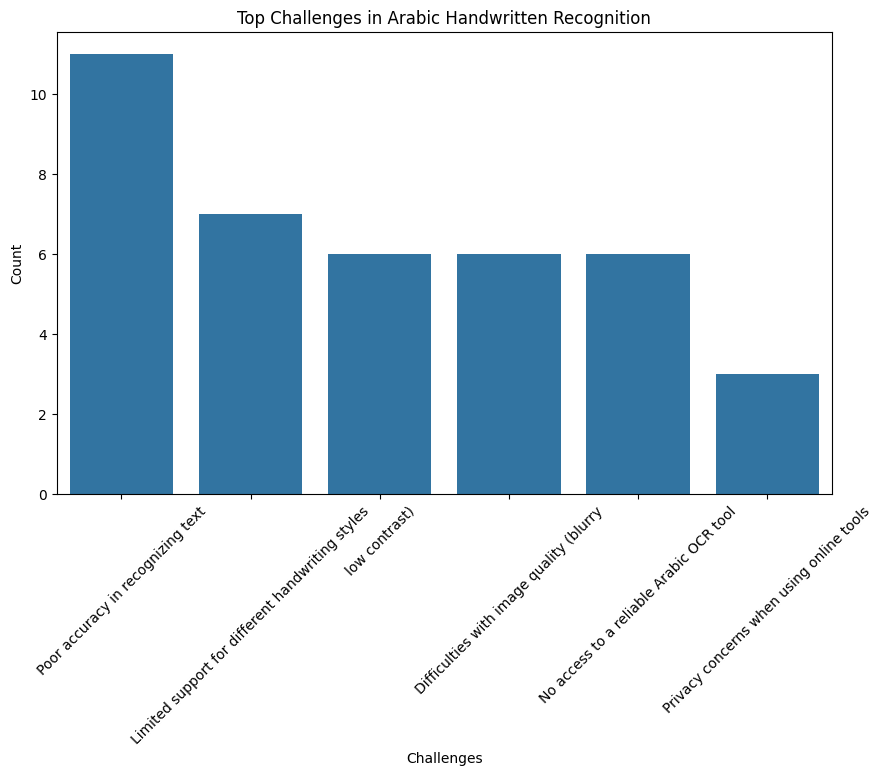

In [44]:
# Visualizing Data
plt.figure(figsize=(10,6))
sns.barplot(x=challenge_counts.index, y=challenge_counts.values)
plt.xticks(rotation=45)
plt.title("Top Challenges in Arabic Handwritten Recognition")
plt.xlabel("Challenges")
plt.ylabel("Count")
plt.show()

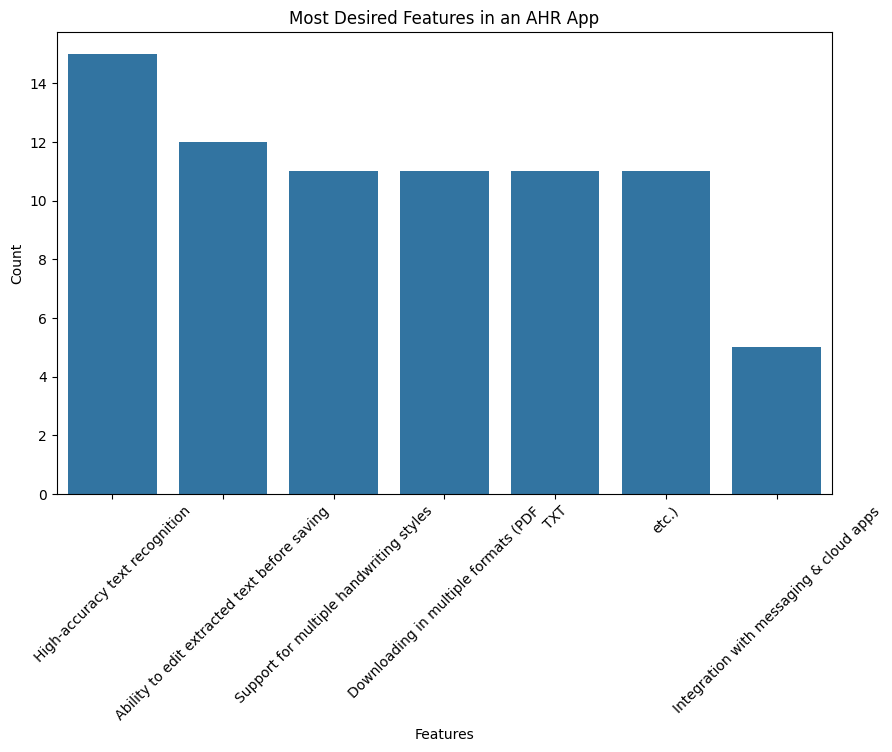

In [45]:
plt.figure(figsize=(10,6))
sns.barplot(x=desired_features_counts.index, y=desired_features_counts.values)
plt.xticks(rotation=45)
plt.title("Most Desired Features in an AHR App")
plt.xlabel("Features")
plt.ylabel("Count")
plt.show()
